# Credit Card Fraud Detection #

# Load Libraries

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import datetime
import matplotlib.pyplot as plt 


# Load Dataset

In [3]:
df = pd.read_csv(r"D:\INTERNSHIP_CODESOFT\fraudTest.csv")
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [5]:
df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,555719.000000,5.557190e+05,555719.000000,555719.000000,555719.000000,555719.000000,5.557190e+05,5.557190e+05,555719.000000,555719.000000,555719.000000
mean,277859.000000,4.178387e+17,69.392810,48842.628015,38.543253,-90.231325,8.822189e+04,1.380679e+09,38.542798,-90.231380,0.003860
std,160422.401459,1.309837e+18,156.745941,26855.283328,5.061336,13.721780,3.003909e+05,5.201104e+06,5.095829,13.733071,0.062008
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.371817e+09,19.027422,-166.671575,0.000000
25%,138929.500000,1.800429e+14,9.630000,26292.000000,34.668900,-96.798000,7.410000e+02,1.376029e+09,34.755302,-96.905129,0.000000
50%,277859.000000,3.521417e+15,47.290000,48174.000000,39.371600,-87.476900,2.408000e+03,1.380762e+09,39.376593,-87.445204,0.000000
75%,416788.500000,4.635331e+15,83.010000,72011.000000,41.894800,-80.175200,1.968500e+04,1.385867e+09,41.954163,-80.264637,0.000000
max,555718.000000,4.992346e+18,22768.110000,99921.000000,65.689900,-67.950300,2.906700e+06,1.388534e+09,66.679297,-66.952026,1.000000


In [6]:
df.dtypes

Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

In [7]:
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

# Preprocessing

In [8]:
df["trans_date_trans_time"] = pd.to_datetime(df["trans_date_trans_time"])
df["dob"] = pd.to_datetime(df["dob"])
df

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,...,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,...,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,...,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0


In [9]:
df.drop(columns=[
    'Unnamed: 0','cc_num','first','last','street',
    'city','state','zip','dob','trans_num','unix_time'
], inplace=True, errors='ignore')
df

,trans_date_trans_time,merchant,category,amt,gender,lat,long,city_pop,job,merch_lat,merch_long,is_fraud
0,2020-06-21 12:14:25,fraud_Kirlin and Sons,personal_care,2.86,M,33.9659,-80.9355,333497,Mechanical engineer,33.986391,-81.200714,0
1,2020-06-21 12:14:33,fraud_Sporer-Keebler,personal_care,29.84,F,40.3207,-110.4360,302,"Sales professional, IT",39.450498,-109.960431,0
2,2020-06-21 12:14:53,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,F,40.6729,-73.5365,34496,"Librarian, public",40.495810,-74.196111,0
3,2020-06-21 12:15:15,fraud_Haley Group,misc_pos,60.05,M,28.5697,-80.8191,54767,Set designer,28.812398,-80.883061,0
4,2020-06-21 12:15:17,fraud_Johnston-Casper,travel,3.19,M,44.2529,-85.0170,1126,Furniture designer,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...,...
555714,2020-12-31 23:59:07,fraud_Reilly and Sons,health_fitness,43.77,M,40.4931,-91.8912,519,Town planner,39.946837,-91.333331,0
555715,2020-12-31 23:59:09,fraud_Hoppe-Parisian,kids_pets,111.84,M,29.0393,-95.4401,28739,Futures trader,29.661049,-96.186633,0
555716,2020-12-31 23:59:15,fraud_Rau-Robel,kids_pets,86.88,F,46.1966,-118.9017,3684,Musician,46.658340,-119.715054,0
555717,2020-12-31 23:59:24,fraud_Breitenberg LLC,travel,7.99,M,44.6255,-116.4493,129,Cartographer,44.470525,-117.080888,0


In [10]:
#Drop all rows that contain missing values 
df.dropna(ignore_index=True)
df

,trans_date_trans_time,merchant,category,amt,gender,lat,long,city_pop,job,merch_lat,merch_long,is_fraud
0,2020-06-21 12:14:25,fraud_Kirlin and Sons,personal_care,2.86,M,33.9659,-80.9355,333497,Mechanical engineer,33.986391,-81.200714,0
1,2020-06-21 12:14:33,fraud_Sporer-Keebler,personal_care,29.84,F,40.3207,-110.4360,302,"Sales professional, IT",39.450498,-109.960431,0
2,2020-06-21 12:14:53,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,F,40.6729,-73.5365,34496,"Librarian, public",40.495810,-74.196111,0
3,2020-06-21 12:15:15,fraud_Haley Group,misc_pos,60.05,M,28.5697,-80.8191,54767,Set designer,28.812398,-80.883061,0
4,2020-06-21 12:15:17,fraud_Johnston-Casper,travel,3.19,M,44.2529,-85.0170,1126,Furniture designer,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...,...
555714,2020-12-31 23:59:07,fraud_Reilly and Sons,health_fitness,43.77,M,40.4931,-91.8912,519,Town planner,39.946837,-91.333331,0
555715,2020-12-31 23:59:09,fraud_Hoppe-Parisian,kids_pets,111.84,M,29.0393,-95.4401,28739,Futures trader,29.661049,-96.186633,0
555716,2020-12-31 23:59:15,fraud_Rau-Robel,kids_pets,86.88,F,46.1966,-118.9017,3684,Musician,46.658340,-119.715054,0
555717,2020-12-31 23:59:24,fraud_Breitenberg LLC,travel,7.99,M,44.6255,-116.4493,129,Cartographer,44.470525,-117.080888,0


In [11]:
df.dropna(ignore_index=True)

,trans_date_trans_time,merchant,category,amt,gender,lat,long,city_pop,job,merch_lat,merch_long,is_fraud
0,2020-06-21 12:14:25,fraud_Kirlin and Sons,personal_care,2.86,M,33.9659,-80.9355,333497,Mechanical engineer,33.986391,-81.200714,0
1,2020-06-21 12:14:33,fraud_Sporer-Keebler,personal_care,29.84,F,40.3207,-110.4360,302,"Sales professional, IT",39.450498,-109.960431,0
2,2020-06-21 12:14:53,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,F,40.6729,-73.5365,34496,"Librarian, public",40.495810,-74.196111,0
3,2020-06-21 12:15:15,fraud_Haley Group,misc_pos,60.05,M,28.5697,-80.8191,54767,Set designer,28.812398,-80.883061,0
4,2020-06-21 12:15:17,fraud_Johnston-Casper,travel,3.19,M,44.2529,-85.0170,1126,Furniture designer,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...,...
555714,2020-12-31 23:59:07,fraud_Reilly and Sons,health_fitness,43.77,M,40.4931,-91.8912,519,Town planner,39.946837,-91.333331,0
555715,2020-12-31 23:59:09,fraud_Hoppe-Parisian,kids_pets,111.84,M,29.0393,-95.4401,28739,Futures trader,29.661049,-96.186633,0
555716,2020-12-31 23:59:15,fraud_Rau-Robel,kids_pets,86.88,F,46.1966,-118.9017,3684,Musician,46.658340,-119.715054,0
555717,2020-12-31 23:59:24,fraud_Breitenberg LLC,travel,7.99,M,44.6255,-116.4493,129,Cartographer,44.470525,-117.080888,0


In [12]:
encoder = LabelEncoder()
df["merchant"] = encoder.fit_transform(df["merchant"])
df["category"] = encoder.fit_transform(df["category"])
df["gender"] = encoder.fit_transform(df["gender"])
df["job"] = encoder.fit_transform(df["job"])

In [13]:
df

,trans_date_trans_time,merchant,category,amt,gender,lat,long,city_pop,job,merch_lat,merch_long,is_fraud
0,2020-06-21 12:14:25,319,10,2.86,1,33.9659,-80.9355,333497,275,33.986391,-81.200714,0
1,2020-06-21 12:14:33,591,10,29.84,0,40.3207,-110.4360,302,392,39.450498,-109.960431,0
2,2020-06-21 12:14:53,611,5,41.28,0,40.6729,-73.5365,34496,259,40.495810,-74.196111,0
3,2020-06-21 12:15:15,222,9,60.05,1,28.5697,-80.8191,54767,407,28.812398,-80.883061,0
4,2020-06-21 12:15:17,292,13,3.19,1,44.2529,-85.0170,1126,196,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...,...
555714,2020-12-31 23:59:07,507,5,43.77,1,40.4931,-91.8912,519,460,39.946837,-91.333331,0
555715,2020-12-31 23:59:09,264,7,111.84,1,29.0393,-95.4401,28739,198,29.661049,-96.186633,0
555716,2020-12-31 23:59:15,496,7,86.88,0,46.1966,-118.9017,3684,294,46.658340,-119.715054,0
555717,2020-12-31 23:59:24,75,13,7.99,1,44.6255,-116.4493,129,58,44.470525,-117.080888,0


# EDA

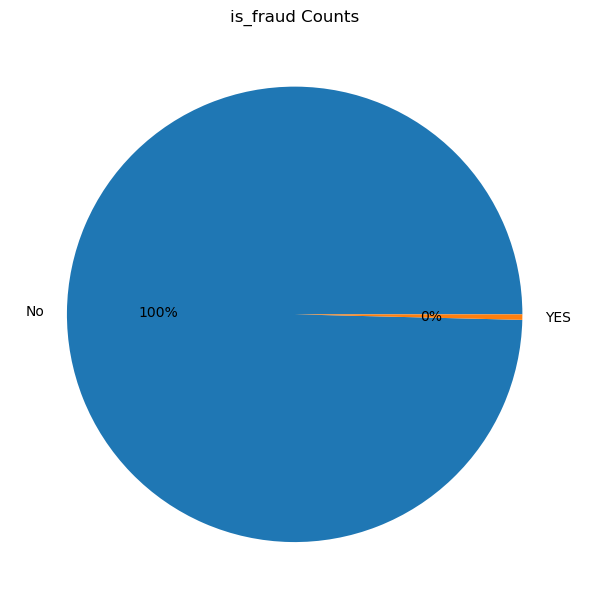

In [14]:
exit_counts = df["is_fraud"].value_counts()
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # Subplot for the pie chart
plt.pie(exit_counts, labels=["No", "YES"], autopct="%0.0f%%")
plt.title("is_fraud Counts")
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

# Train The Model

In [15]:
X = df.drop('is_fraud', axis=1)
y = df['is_fraud']


In [16]:
X = pd.get_dummies(X, drop_first=True)

# feature scaling

In [18]:
numeric_cols = X.select_dtypes(include=['int64','float64'])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(numeric_cols)


In [19]:
#train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


# Train Models

# Logistic Regression

In [20]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)


# Decision Tree

In [21]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)


# Random Forest

In [22]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)


# Evaluation

In [23]:
print("Logistic Regression")
print(classification_report(y_test, y_pred_lr))

print("Decision Tree")
print(classification_report(y_test, y_pred_dt))

print("Random Forest")
print(classification_report(y_test, y_pred_rf))


Logistic Regression
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    110718
           1       0.00      0.00      0.00       426

    accuracy                           1.00    111144
   macro avg       0.50      0.50      0.50    111144
weighted avg       0.99      1.00      0.99    111144

Decision Tree
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    110718
           1       0.61      0.61      0.61       426

    accuracy                           1.00    111144
   macro avg       0.80      0.80      0.80    111144
weighted avg       1.00      1.00      1.00    111144

Random Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    110718
           1       0.88      0.60      0.71       426

    accuracy                           1.00    111144
   macro avg       0.94      0.80      0.85    111144
weighted avg       1.00   

# Accuracy Comparison


In [24]:
print("LR Accuracy:", accuracy_score(y_test, y_pred_lr))
print("DT Accuracy:", accuracy_score(y_test, y_pred_dt))
print("RF Accuracy:", accuracy_score(y_test, y_pred_rf))


LR Accuracy: 0.9958432304038005
DT Accuracy: 0.9970128841862809
RF Accuracy: 0.9981285539480313
